# PROBLEM SET 1 - PART 4

## André Filipe Silva - 26005

# a)

Warning message:
"package 'quantmod' was built under R version 3.6.2"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.2"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warn

[1] "NAEXKP01PTA657S"

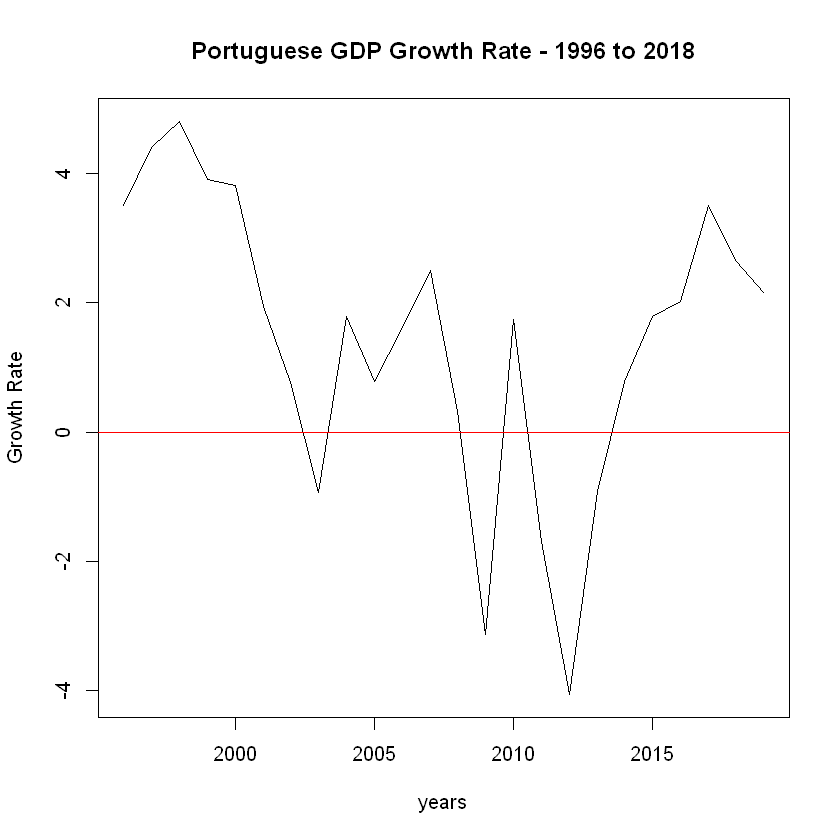

In [1]:
library(quantmod)

getSymbols("NAEXKP01PTA657S", src= "FRED")
GDP_growth = ts(as.vector(NAEXKP01PTA657S), start = 1996, deltat=1)
plot(GDP_growth,main="Portuguese GDP Growth Rate - 1996 to 2018", xlab="years", ylab="Growth Rate")
abline(h=0, col="red")

The time series does appear to be stationary, as it revolves around a mean of (seemingly) 0. However, being sure just by looking at a plot is unwise. This is just a first approximation. Further testing would need to be done to conclude with certainty.

# b)

To do this, we follow the Box-Jenkins methodology.

Step 1 - Stationarity

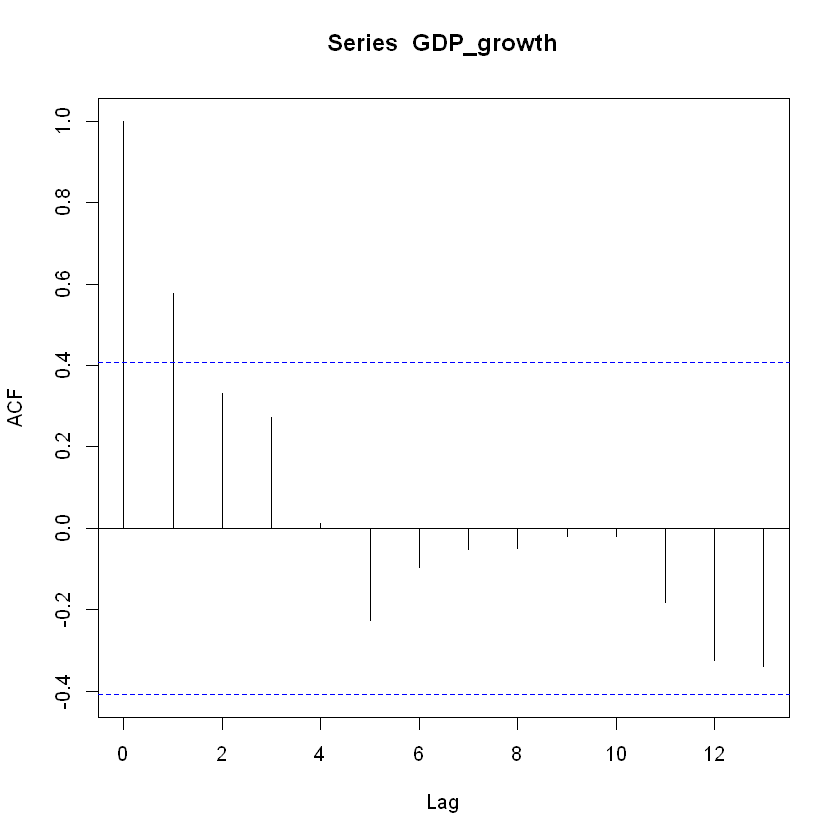

In [21]:
acf(GDP_growth)

The series looks stationary, as there is a decay in autocorrelation. It starts to pick up again after the 10th lag, but it is still "within boundaries" - within our confidence interval. So, I conclude the series to look stationary.

Step 2 - ARMA Identification

Since we are attempting to identify an ARMA model, we can't resort to ACF or PACF - Information Criterias are the best tool. The use of AIC is preferred in small samples, and that is what I will use.

In [22]:
AIC = matrix(nrow=8, ncol=8,dimnames=list(c(paste("p=",0:7)),(c(paste("q=",0:7)))))

for(i in 1:nrow(AIC)) {
  for(j in 1:ncol(AIC)) {
    AIC[i, j] = arima(GDP_growth, order=c(i-1,0,j-1))$aic
  }
}


AIC


AIC == min(AIC)

Warning message in arima(GDP_growth, order = c(i - 1, 0, j - 1)):
"possible convergence problem: optim gave code = 1"Warning message in arima(GDP_growth, order = c(i - 1, 0, j - 1)):
"possible convergence problem: optim gave code = 1"

,q= 0,q= 1,q= 2,q= 3,q= 4,q= 5,q= 6,q= 7
p= 0,106.88282,101.1851,102.4924,102.2526,101.2937,103.1562,105.0450,106.8340
p= 1,99.38727,101.3013,103.1819,102.9473,103.0645,104.0114,106.9995,106.2960
p= 2,101.33754,103.3088,104.9263,102.6937,105.0346,105.0242,107.9715,107.4865
p= 3,102.71758,104.3322,104.1788,106.0303,107.0331,106.3402,108.3383,109.4846
p= 4,103.02052,104.3580,104.0448,105.9807,106.5687,108.4797,109.1269,111.2207
p= 5,103.44346,104.9340,106.9126,108.8148,108.3502,110.3231,110.2968,113.0670
p= 6,104.84895,106.8212,106.1679,107.5368,109.4508,113.0488,115.0418,114.9552
p= 7,106.83414,108.8411,110.7859,109.4301,110.5694,112.3704,115.5965,116.7457


,q= 0,q= 1,q= 2,q= 3,q= 4,q= 5,q= 6,q= 7
p= 0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p= 1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p= 2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p= 3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p= 4,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p= 5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p= 6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
p= 7,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Following this strategy, we conclude for an ARMA(1,0) model - an AR(1) model. Just to be sure, I will run another way to check this below, using the auto.arima().

In [23]:
library(forecast)
arima= auto.arima(GDP_growth)
arima

Series: GDP_growth 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.7002
s.e.  0.1494

sigma^2 estimated as 3.834:  log likelihood=-47.92
AIC=99.83   AICc=100.43   BIC=102.11

This method equals the same results as the previous one. So, I conclude with certainty that the series is stationary and ARMA(1,0,0), which is the same as AR(1).

# c)

In [24]:
arma1= arima(GDP_growth, order=c(1,0,0))
arma1


Call:
arima(x = GDP_growth, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5815     1.5514
s.e.  0.1651     0.8657

sigma^2 estimated as 3.335:  log likelihood = -46.69,  aic = 99.39

The model we are presented with can be written roughly like this: $y_t$= 1.5514 + 0.5815$y_{t-1}$+ $\epsilon_t$

(Note: apologies for my less than good LaTeX expertise)

Since we are looking at an AR(1) model, it is pretty easy to conclude the estimated model is stable just looking ath the coefficient for ar1. It is 0.5815, and the condition for stability is that this parameter is |θ|<1. |0.5815| <1, so the model is stable. It does not have an explosive growth.



# d)

To check the model, we use the Ljung-Box test.

For this test, the hypothesis are as follows:

H$_0$: No serial correlation of the error terms
<br>
H$_1$: Serial correlation of the error terms


	Box-Ljung test

data:  arma1$residuals
X-squared = 15.199, df = 22, p-value = 0.8535


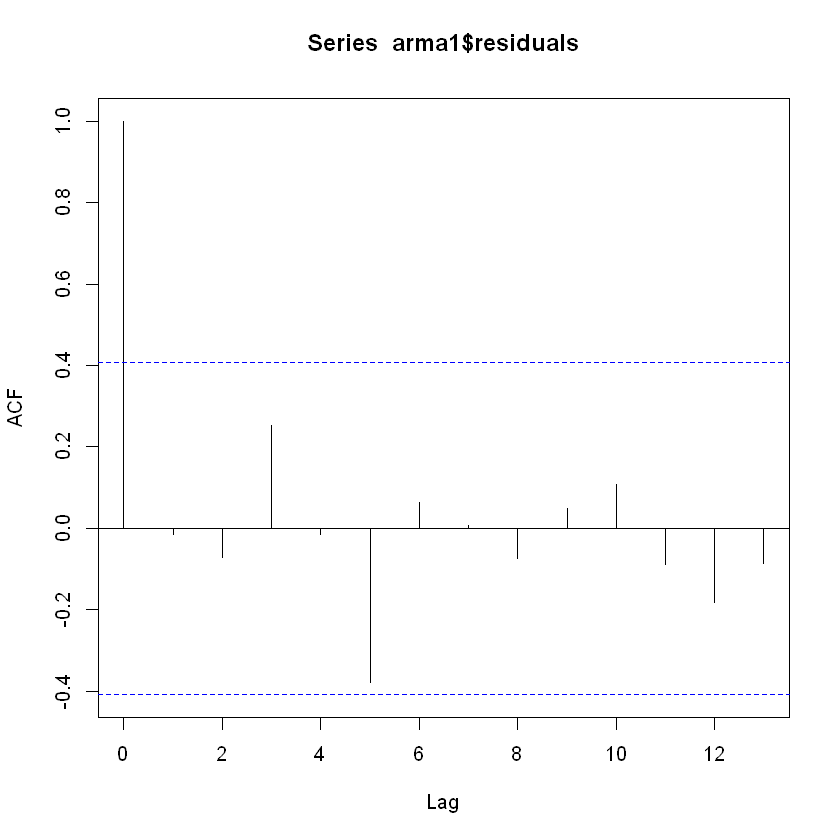

In [25]:
acf(arma1$residuals)
Box.test(arma1$residuals, lag=22, type='Ljung')

The ACF does not show significant autocorrelation in the residuals for any lag length considered. The Ljung-Box test returns a p-value of 0.8535, meaning we do not reject the null hypothesis of no autocorrelation. 

Given this, I conclude the model to be a valid model, properly estimated.

# e)

     Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
2019       2.068844 -0.2715506 4.409238 -1.510481 5.648168
2020       1.852284 -0.8550293 4.559598 -2.288194 5.992763

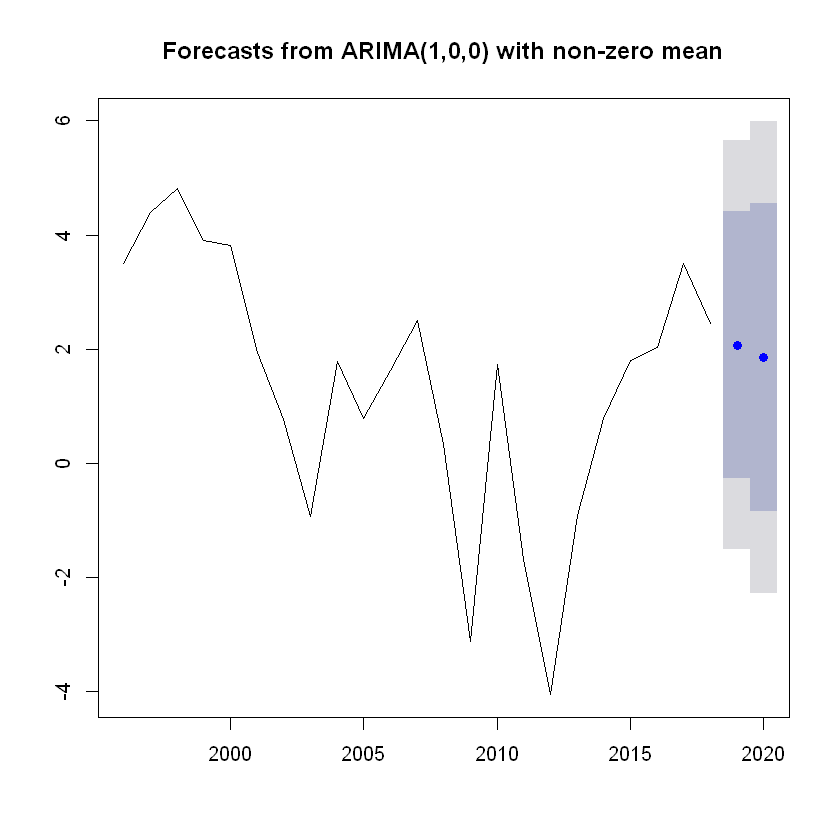

In [29]:
forecast(arma1, h=2)
plot(forecast(arma1, h=2))

(Note: This doesn't look good, graphically speaking, but I couldn't get it to look any nicer. But I did forecast 2019 and 2020.)

In [30]:
forecast(arma1, h=2)

     Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
2019       2.068844 -0.2715506 4.409238 -1.510481 5.648168
2020       1.852284 -0.8550293 4.559598 -2.288194 5.992763

Bank of Portugal official Forecasts:
<br>
2019: 2.0%
<br>
2020: 1.7%

My forecast is better for 2019 than it is for 2020. However, forecasts are always better the closest we are to the period being forecasted - as can be seen by the smaller variance for the 2019 estimate.


Below I plot my forecasts with the predictions for 2019 and 2020 for a better graphical view.

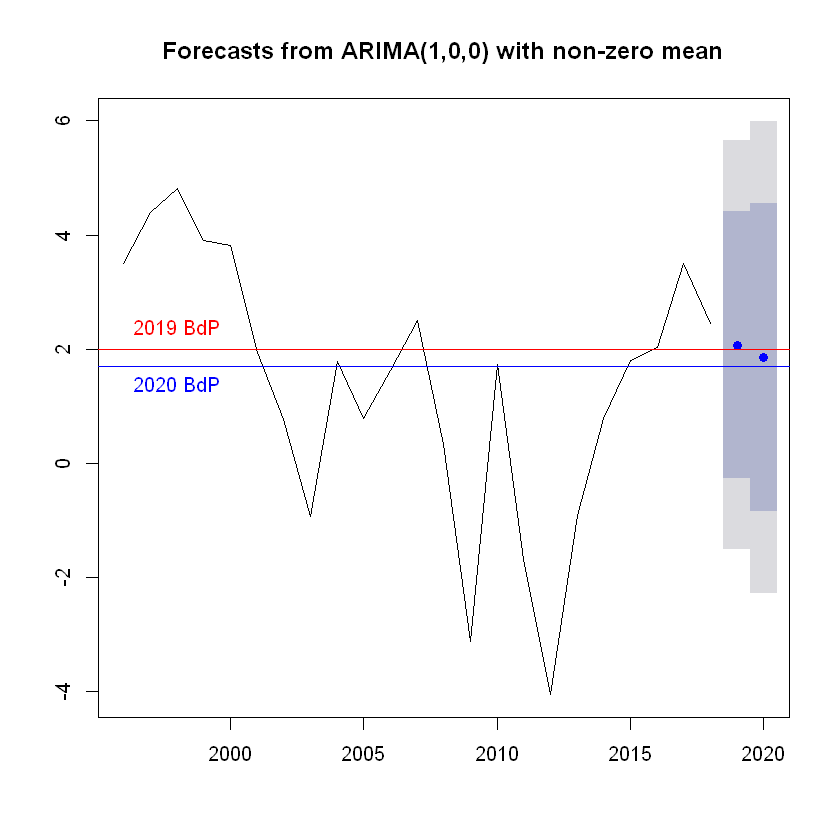

In [41]:
plot(forecast(arma1, h=2))
abline(h=2, col="red")
text(1998,2.4, "2019 BdP", col = "red")
abline(h=1.7, col="blue")
text(1998,1.4, "2020 BdP", col = "blue")